In [28]:
import pandas as pd
import numpy as np

In [29]:
train_df = pd.read_csv("train.csv")
gas_df = pd.read_csv("gas_prices.csv")
electricity_df = pd.read_csv("electricity_prices.csv")
client_df = pd.read_csv("client.csv")
fw_df = pd.read_csv("forecast_weather.csv")
hw_df = pd.read_csv("historical_weather.csv")
location = pd.read_csv("county_lon_lats.csv")

In [7]:
train_df

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2
...,...,...,...,...,...,...,...,...,...
2018347,15,1,0,197.233,1,2023-05-31 23:00:00,637,2018347,64
2018348,15,1,1,0.000,0,2023-05-31 23:00:00,637,2018348,59
2018349,15,1,1,28.404,1,2023-05-31 23:00:00,637,2018349,59
2018350,15,1,3,0.000,0,2023-05-31 23:00:00,637,2018350,60


In [8]:
train_df.describe()

,county,is_business,product_type,target,is_consumption,data_block_id,row_id,prediction_unit_id
count,2.018352e+06,2.018352e+06,2.018352e+06,2.017824e+06,2018352.0,2.018352e+06,2.018352e+06,2.018352e+06
mean,7.297034e+00,5.368261e-01,1.898927e+00,2.748556e+02,0.5,3.218746e+02,1.009176e+06,3.304538e+01
std,4.780990e+00,4.986421e-01,1.081766e+00,9.095024e+02,0.5,1.826343e+02,5.826482e+05,1.959059e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,0.000000e+00,1.000000e+00,3.780000e-01,0.0,1.660000e+02,5.045878e+05,1.600000e+01
50%,7.000000e+00,1.000000e+00,2.000000e+00,3.113300e+01,0.5,3.230000e+02,1.009176e+06,3.300000e+01
75%,1.100000e+01,1.000000e+00,3.000000e+00,1.802062e+02,1.0,4.790000e+02,1.513763e+06,5.000000e+01
max,1.500000e+01,1.000000e+00,3.000000e+00,1.548027e+04,1.0,6.370000e+02,2.018351e+06,6.800000e+01


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018352 entries, 0 to 2018351
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   county              int64  
 1   is_business         int64  
 2   product_type        int64  
 3   target              float64
 4   is_consumption      int64  
 5   datetime            object 
 6   data_block_id       int64  
 7   row_id              int64  
 8   prediction_unit_id  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 138.6+ MB


In [10]:
train_df.isnull().sum()

county                  0
is_business             0
product_type            0
target                528
is_consumption          0
datetime                0
data_block_id           0
row_id                  0
prediction_unit_id      0
dtype: int64

In [11]:
fw_df.isnull().sum()

latitude                             0
longitude                            0
origin_datetime                      0
hours_ahead                          0
temperature                          0
dewpoint                             0
cloudcover_high                      0
cloudcover_low                       0
cloudcover_mid                       0
cloudcover_total                     0
10_metre_u_wind_component            0
10_metre_v_wind_component            0
data_block_id                        0
forecast_datetime                    0
direct_solar_radiation               0
surface_solar_radiation_downwards    2
snowfall                             0
total_precipitation                  0
dtype: int64

In [12]:
gas_df.isnull().sum()

forecast_date            0
lowest_price_per_mwh     0
highest_price_per_mwh    0
origin_date              0
data_block_id            0
dtype: int64

In [13]:
client_df.isnull().sum()

product_type          0
county                0
eic_count             0
installed_capacity    0
is_business           0
date                  0
data_block_id         0
dtype: int64

In [14]:
electricity_df.isnull().sum()

forecast_date    0
euros_per_mwh    0
origin_date      0
data_block_id    0
dtype: int64

In [15]:
hw_df.isnull().sum()

datetime                  0
temperature               0
dewpoint                  0
rain                      0
snowfall                  0
surface_pressure          0
cloudcover_total          0
cloudcover_low            0
cloudcover_mid            0
cloudcover_high           0
windspeed_10m             0
winddirection_10m         0
shortwave_radiation       0
direct_solar_radiation    0
diffuse_radiation         0
latitude                  0
longitude                 0
data_block_id             0
dtype: int64

In [16]:
location.isnull().sum()

Unnamed: 0    0
county        0
longitude     0
latitude      0
dtype: int64

In [17]:
location = location.drop(columns = ["Unnamed: 0"])

## Businesses consume a lot of energy

In [18]:
train_df[["county", "is_business", "is_consumption","target"]].groupby(["county", "is_business", "is_consumption"], as_index=False).mean().sort_values(by='target', ascending=False)

,county,is_business,is_consumption,target
3,0,1,1,2408.799789
45,11,1,1,1504.424537
55,14,1,1,757.192055
1,0,0,1,595.603919
23,5,1,1,575.611298
47,12,1,1,547.225536
29,7,1,1,505.354107
41,10,1,1,489.104213
15,3,1,1,468.448312
11,2,1,1,436.240592


## County 0 and 11 consume a lot of energy

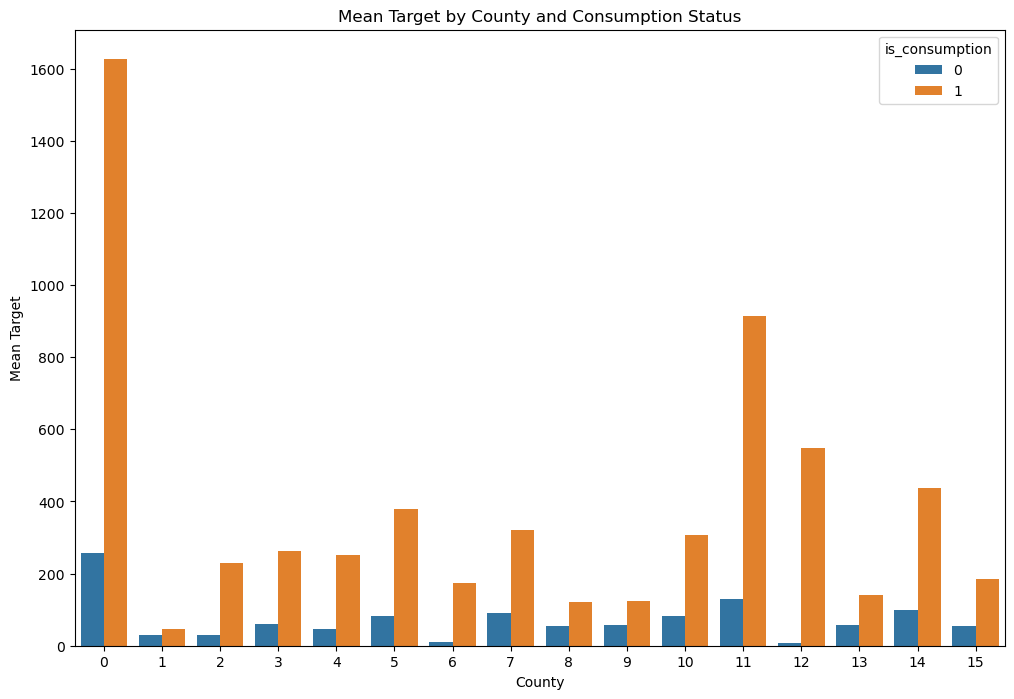

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by county and is_consumption, calculate mean target
grouped_df = train_df.groupby(["county", "is_consumption"], as_index=False)["target"].mean()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_df, x="county", y="target", hue="is_consumption")
plt.title("Mean Target by County and Consumption Status")
plt.xlabel("County")
plt.ylabel("Mean Target")
plt.xticks()
plt.show()


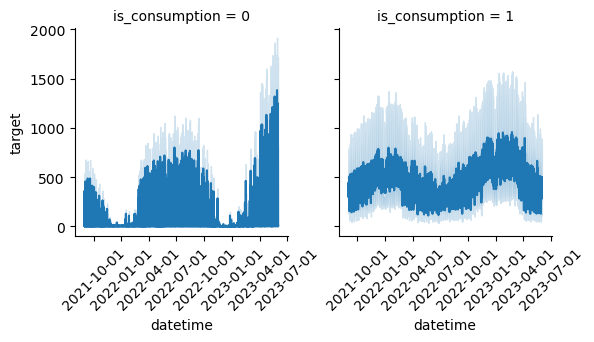

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo một FacetGrid với col là 'is_consumption'
g = sns.FacetGrid(train_df, col='is_consumption')

# Vẽ biểu đồ dạng histogram với 'datetime' trên trục x và giá trị trung bình của 'target' trên trục y
g.map_dataframe(sns.lineplot, x='datetime', y='target', estimator='mean')

# Định dạng xác định cho trục x
g.set_xticklabels(rotation=45)

# Hiển thị biểu đồ
plt.show()


In [24]:
train_df['date']

0           1
1           1
2           1
3           1
4           1
           ..
2018347    31
2018348    31
2018349    31
2018350    31
2018351    31
Name: date, Length: 2018352, dtype: int64

In [ ]:
# preprocess data and generate essential features
def preprocess_client(train: pd.DataFrame, client: pd.DataFrame):
    """
    Preprocess the training and client data by merging, filling missing values,
    extracting datetime features, and scaling numerical features.
    """
    # reduce 'data_block_id' in the 'client' DataFrame by 2 to match 'train' DataFrame
    client['data_block_id'] -= 2

    # merge the client data with the train data
    train = train.merge(
        client[['installed_capacity', 'eic_count', 'data_block_id', 'county', 'is_business', 'product_type']],
        how='left',
        on=['data_block_id', 'county', 'is_business', 'product_type']
    )

    # convert 'datetime' to datetime object and extract features
    train['month'] = train['datetime'].dt.month
    train['hour'] = train['datetime'].dt.hour
    train['dayofweek'] = train['datetime'].dt.dayofweek

    # set 'datetime' as the DataFrame index and sort it
    train.set_index('datetime', inplace=True)
    train.sort_index(inplace=True)

    return train, scaler